# Exercise 1
Using the finite difference method compute the transported form of:
- Top Hat
- Spike
- Sinusoidal 

In [75]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [76]:
# Discretization parameters
dx = 0.1 # space
dt = 0.01 # time
a = 1


In [77]:
# We assume that the disturbance has a width of 1, and that it always starts at x = 1
 
x_start = 0
x_end = 3+dx

_x = np.arange(x_start, x_end, dx)

delta_x_ = 1 # Interval of the "disturbance"
t_start = 0

In [78]:


def top_hat(x, x_start, dx):
    # Top hat parametrization

    # 2     ___
    #      |   |
    # 1 ___|   |___
    #   0  1   2  3

    if x_start <= x <= x_start + dx:
        return 2
    else:
        return 1

In [79]:
def triang(x, x_start, dx):
    # Triangular waveform parametrization
    #2       /\
    #       /  \ 
    #      /    \
    #1____/______\_____
    # 0   1      2    3

    mid = x_start + dx/2
   
    if x_start <= x <= mid:
        return 2*x - 1
    elif mid < x <= x_start + dx:
        return -2*x  + 5
    else:
        return 1

In [80]:
def sine(x, x_start, dx):
    # Sine waveform parametrization
    if x_start <= x <= x_start + dx:
        return -np.sin(np.pi*x/dx) + 1
    else:
        return 1    


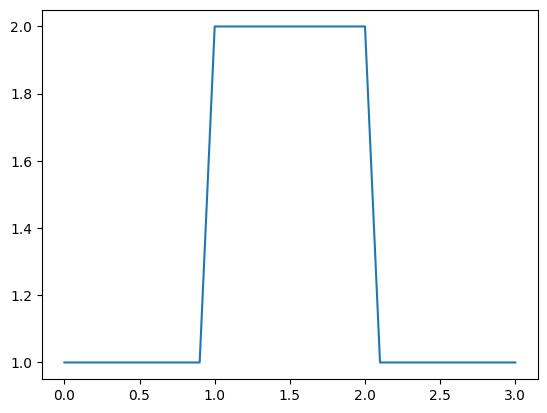

In [81]:
# Plot top hat
plt.plot(_x, [top_hat(x, 1, 1) for x in _x], label="Top hat")
plt.show()

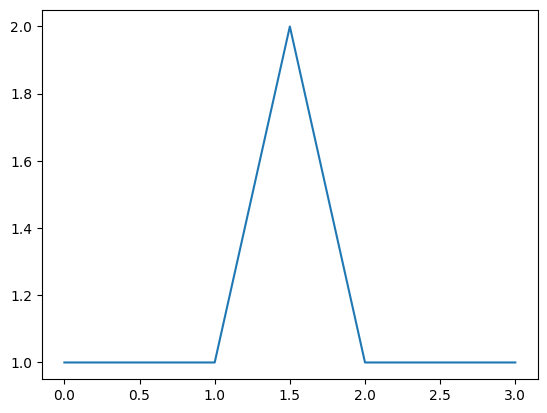

In [82]:
plt.plot(_x, [triang(x, 1, 1) for x in _x], label="Triangular")
plt.show()

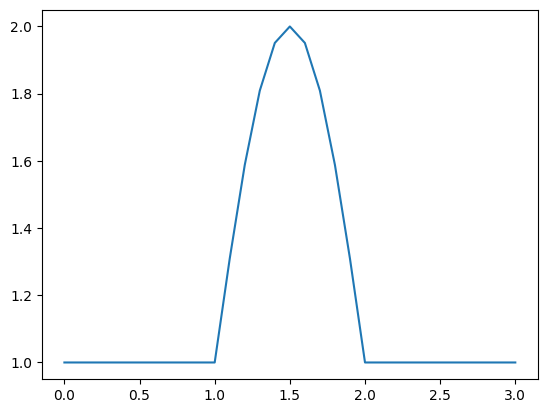

In [83]:
plt.plot(_x, [sine(x, 1, 1) for x in _x], label="Sine")
plt.show()

In [93]:
def propagate(u, dx, dt, boundary_conditions, a=1, n_steps=1):
    # Propagate the disturbance
    c = 0.5

    lb = boundary_conditions[0]
    rb = boundary_conditions[1]

    assert c <= 1, "CFL condition not met"
    print(f"CFL condition met: {c}")

    u_prop = np.zeros((len(u), n_steps))
    for i in range(n_steps):
        u_new = u_prop[:,i]
        u_new[0] = lb
        for j in range(1,len(u)-1):
            u_new[j] = u[j] - c*(u[j] - u[j-1])
        u_new[-1] = rb
        u = u_new


    return u_prop


CFL condition met: 0.5


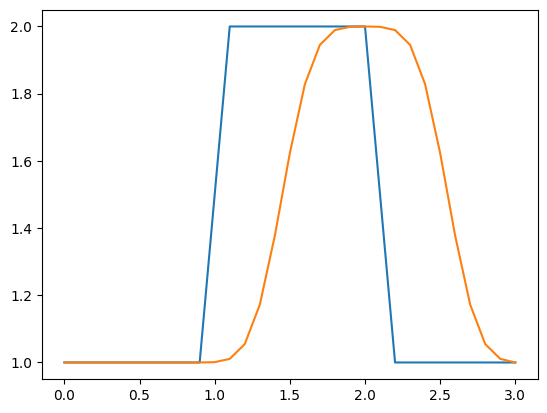

In [96]:
u_prop = propagate([top_hat(x, 1, 1) for x in _x], dx, dt, (1, 1), a, 10)


plt.plot(_x, u_prop[:,0], label="t=0")
# Shift last index back in time

plt.plot(_x, u_prop[:,-1], label="t=1")